# Interpolation
**FIZ353 - Numerical Analysis | 18/12/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

In our [Regression lecture](https://emresururi.github.io/FIZ353/FIZ353_07_Regression.html), we talked about fitting a function/model/curve that passes _as close as possible_ to a given set of data points. But sometimes we find ourselves in a case where we have clearly defined points and would like to know about the behaviour between these points. This method of estimating the intermediate values while retaining the known values is known as _interpolation_.

The given data points act as the _boundary conditions_, usually fixed and thus very suitable for interpolation applcations. We are given a partial look on the system which corresponds to the _initial conditions_.

As was the case in regression, there is always a risk of _overfitting_ alas in the interpolation, we **must** hit all the given data (within an error tolerance that is related to the measurements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Polynomial Interpolation
Revisiting our discussion in regression, we can _always_ fit a set of $n$ data points using a polynomial of $(n-1)$th order:

|$i$|$x_i$|$y_i$|
|---|---|---|
|1|10|25|
|2|20|70|
|3|30|380|
|4|40|550|
|5|50|610|
|6|60|1220|
|7|70|830|
|8|80|1450|

## Polyfit, poly1d, polyval and poly + roots
We can use numpy's built in polynomial functions to fit (`polyfit`), evaluate (`poly1d` & `polyval`) and even construct polynomials from roots (`poly`) or _vice versa_ (`roots`).

[ 2.31051587e-07 -6.89097222e-05  8.34131944e-03 -5.27253472e-01
  1.86274861e+01 -3.63810556e+02  3.60735714e+03 -1.37900000e+04]
----------------------------------------------------------------------
           7             6            5          4         3         2
2.311e-07 x - 6.891e-05 x + 0.008341 x - 0.5273 x + 18.63 x - 363.8 x + 3607 x - 1.379e+04
[  25.           70.          380.          550.          610.
 1220.          830.         1449.99999999]
[  25.           70.          380.          550.          610.
 1220.          830.         1449.99999999]


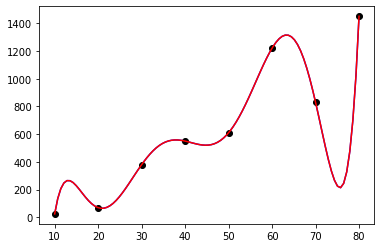

In [2]:
data = np.array([range(10,90,10),[25,70,380,550,610,1220,830,1450]]).T
x = data[:,0]
y = data[:,1]

p = np.polyfit(x,y,len(x)-1)
print(p)

xx = np.linspace(10,80,100)
yy = np.zeros(len(xx))
n = len(x)
for k in range(n):
    yy += p[k]*xx**(n-k-1)
print("-"*70)
# we could as well had used poly1d function
# to functionalize the polynomial 8)
f = np.poly1d(p)
print(f)
print(f(x))

# another alternative is to use polyval:
g = np.polyval(p,x)
print(g)

plt.plot(xx,yy,"-b",x,y,"ok",xx,f(xx),"-r")
plt.show()

A 7th degree polynomial might be too much for our taste! 8) So let's begin with something simpler. For example, what would be the polynomial whose roots are -1 and 2?..

Since it has two roots, it must be a second order polynomial (_quadratic_):

In [3]:
q = np.poly([-1,2])
print(q)

[ 1. -1. -2.]


To write it more neatly, we can construct a poly object using the coefficients:

In [4]:
qq = np.poly1d(q)
print(qq)

   2
1 x - 1 x - 2


$$x^2-x-2$$ ladies and gents!

Let's go from reverse and find the roots of a given polynomial via `roots`:

In [5]:
x12 = np.roots(qq)
print(x12)

[ 2. -1.]


In [6]:
# feeding the coefficients would also work:
x12 = np.roots(q)
print(x12)

[ 2. -1.]


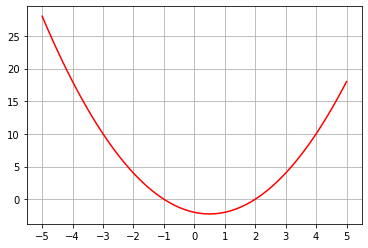

In [7]:
xx = np.linspace(-5,5,100)
yy = np.polyval(qq,xx)
plt.plot(xx,yy,"-r")
plt.xticks(np.arange(-5,6,1))
plt.yticks(np.arange(0,26,5))
plt.grid(True)
plt.show()

## Dearest dear linear algebra! <3
Now, let's take 3 points from our designated polynomial, and afterwards forget about the actual polynomial:

[[-3.1  14.71]
 [ 0.7   1.79]
 [ 4.3  16.19]]


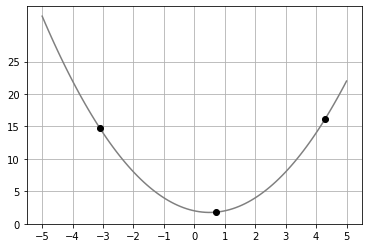

In [8]:
qc = [1, -1, 2]
qq = np.poly1d(qc)
x = [-3.1,0.7,4.3]
y = qq(x)
print(np.array([x,y]).T)

xx = np.linspace(-5,5,100)
yy = np.polyval(qq,xx)
plt.plot(xx,yy,color="gray")
plt.plot(x,y,"ko")
plt.xticks(np.arange(-5,6,1))
plt.yticks(np.arange(0,26,5))
plt.grid(True)
plt.show()
#plt.show()

This is the part where we forget our polynomial information:
$$Q(x) = 1x^2-1x+2$$

and thus, we are left with the data points to ponder on:

x|-3.1|0.7|4.3
---|---|---|---
y|14.71|1.79|16.19

We have 3 data-points, so we'll assume a 2nd order polynomial in the form:

$$Q(x) = q_1 x^2 + q_2 x^1 + q_3 x^0$$

and we have:

$$Q(-3.1) = q_1 (-3.1)^2+q_2 (-3.1)+q_3 = 14.71\\
Q(0.7) = q_1 (0.7)^2+q_2 (0.7)+q_3 = 1.79\\
Q(4.3) = q_1 (4.3)^2+q_2 (4.3)+q_3 = 16.19
$$

In [9]:
x = np.array([-3.1, 0.7, 4.3])
print(x**2)

[ 9.61  0.49 18.49]


$$Q(-3.1) = 9.61q_1-3.1 q_2+q_3 = 14.71\\
Q(0.7) = 0.49 q1+0.7q_2+q_3 = 1.79\\
Q(4.3) = 18.49 q_1+4.3 q_2+q_3 = 16.19
$$

so, it is actually nothing but 3 equations with 3 unknowns! We know how to solve it! 8)

$$\begin{pmatrix}
9.61 & -3.1 & 1\\
0.49&0.7&1\\
18.49&4.3&1
\end{pmatrix}
\begin{pmatrix}q_1\\q_2\\q_3\end{pmatrix}
=
\begin{pmatrix}14.71\\1.79\\16.19\end{pmatrix}
$$

In [10]:
A = np.array([[9.61,-3.1,1],[0.49,0.7,1],[18.49,4.3,1]])
b = np.array([14.71,1.79,16.19])
q123 = np.linalg.solve(A,b)
print(q123)

[ 1. -1.  2.]


... ta-taaaa!

# Newton Interpolating Polynomials
Newton polynomials incorporate known (given) points to go for the next one. For example, if two points are known, we pass a line through them and using similarity, we evaluate the value at the specified point.

Suppose we have $x_1,f(x_1)$, $x_2,f(x_2)$ and we want to evaluate it at $x$. We haven't been given the actual function so the situation is something like this:

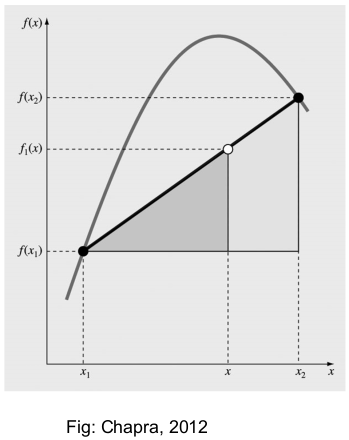

(don't forget that we don't know / can't see the real function but only know about the two data points $(x_1,x_2)$)

So, we'll reach $f(x)$ via similarity -- going through the definition of the slope, we have:

$$\frac{f_1(x)-f(x_1)}{x-x_1} = \frac{f(x_2)-f(x_1)}{x_2-x_1}$$

singling out $f_1(x)$, we get:

$$\boxed{f_1(x)=f(x_1)+\frac{f(x_2)-f(x_1)}{x_2-x_1} (x-x_1)}$$


_The indice "1" in $f_1$ denotes that this is a first-order (linear) interpolation._

## Example: 
Estimate $\ln2$ using:
1. $\ln1 = 0$ and $\ln6=1.791759$
2. $\ln1 = 0$ and $\ln4=1.386294$

(calculate the true percentage relative error ($\varepsilon_t$) using the true value of $\ln2 = 0.693147$)

In [11]:
# 1
ln1 = 0
ln6 = 1.791759

ln2_1 = ln1 + (ln6-ln1)/(6-1)*(2-1)
print("      ln2 ~ {:.6f}".format(ln2_1))
print("True value: {:.6f}".format(np.log(2)))
print("       E_t: {:.2f}%".format((np.log(2)-ln2_1)/np.log(2)*100))

      ln2 ~ 0.358352
True value: 0.693147
       E_t: 48.30%


In [12]:
# 1
ln1 = 0
ln4 = 1.386294

ln2_2 = ln1 + (ln4-ln1)/(4-1)*(2-1)
print("      ln2 ~ {:.6f}".format(ln2_2))
print("True value: {:.6f}".format(np.log(2)))
print("       E_t: {:.2f}%".format((np.log(2)-ln2_2)/np.log(2)*100))

      ln2 ~ 0.462098
True value: 0.693147
       E_t: 33.33%


## Increasing the order
Newton's polynomials are represented in increasing order as:

$$\begin{align*}
f_1(x) &= b_1 + b_2(x-x_1)\\
f_2(x) &= b_1 + b_2(x-x_1)+b_3(x-x_1)(x-x_2)\\
f_3(x) &= b_1 + b_2(x-x_1)+b_3(x-x_1)(x-x_2)+b_4(x-x_1)(x-x_2)(x-x_3)\\
&\dots\end{align*}$$

here, the $b$ coefficients are derived using the previously calculated coefficients, starting from the 1st one we have calculated using similarity (i.e., $b_2 = \frac{f(x_2)-f(x_1)}{x_2-x_1}$). So actually, we use the previous one's form to calculate the current:

$$b_1 : f(x') \Rightarrow b_2 = \frac{f(x_2)-f(x_1)}{x_2-x_1}$$


$$b_2 : \frac{f(x'')-f(x')}{x''-x'} \Rightarrow b_3 = \frac{\frac{f(x_3)-f(x_2)}{x_3-x_2}-\frac{f(x_2)-f(x_1)}{x_2-x_1}}{x_3 - x_1}$$

these coefficients are called as _divided differences_.

Here's a scheme of how to proceed forward in calculating these divided differences:

$$\begin{matrix}
   x_1 & f(x_1) &                                 & \\
       &        & {f(x_2)-f(x_1)\over x_2 - x_1}  & \\
   x_2 & f(x_2) &                                 & {{f(x_3)-f(x_2)\over x_3 - x_2}-{f(x_2)-f(x_1)\over x_2 - x_1} \over x_3 - x_1} \\
       &        & {f(x_3)-f(x_2)\over x_3 - x_2}  & \\
   x_3 & f(x_3) &                                 & \vdots \\
       &        & \vdots                          & \\
\vdots &        &                                 & \vdots \\
       &        & \vdots                          & \\
   x_n & f(x_n) &                                 & \\
\end{matrix}$$

Let's put this into action in our next (evolved) example:

### Example
Use the three of the previous given $\ln(x)$ values to estimate $\ln2$.

* $x_1 = 1,\;f(x_1) = 0$
* $x_2 = 4,\;f(x_2)=1.386294$
* $x_3 = 6,\;f(x_3)=1.791759$

(calculate the true percentage relative error ($\varepsilon_t$) using the true value of $\ln2 = 0.693147$)

$$\begin{matrix}
   x_1=1 & b_1 = f(x_1)=0 &                                 & \\
       &        & b_2={f(x_2)-f(x_1)\over x_2 - x_1} = 0.462098& \\
   x_2=4 & f(x_2)= 1.386294&                                 & b_3={{f(x_3)-f(x_2)\over x_3 - x_2}-{f(x_2)-f(x_1)\over x_2 - x_1} \over x_3 - x_1}= -0.051873\\
       &        & {f(x_3)-f(x_2)\over x_3 - x_2} = 0.202733 & \\
   x_3=6 & f(x_3)=1.791759 &                                 &  
\end{matrix}$$

$$f_2(x) = f(x_1) + b_2 (x-x_1) + b_3 (x-x_1)(x-x_2)$$

In [53]:
x1 = 1
f_x1 = 0
x2 = 4
f_x2 = 1.386294
x3 = 6
f_x3 = 1.791759

b1 = f_x1
b2 = (f_x2 - f_x1)/(x2-x1)
c2 = (f_x3 - f_x2)/(x3-x2)

b3 = (c2 - b2)/(x3-x1)

x = 2
f_x = f_x1 + b2*(x-x1)+b3*(x-x1)*(x-x2)

print("      ln2 ~ {:.6f}".format(f_x))
print("True value: {:.6f}".format(np.log(2)))
print("       E_t: {:.2f}%".format((np.log(2)-f_x)/np.log(2)*100))

      ln2 ~ 0.565844
True value: 0.693147
       E_t: 18.37%


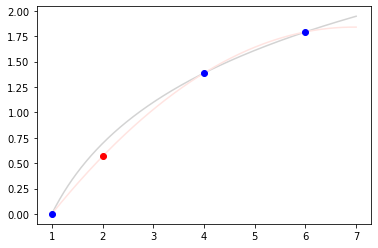

In [14]:
# Plotting the given data, our estimation for x=2
# and the actual function:
xx = np.linspace(1,7,300)
yy = np.log(xx)
yN = f_x1 + b2*(xx-x1)+b3*(xx-x1)*(xx-x2)
data_x = np.array([x1,x2,x3,x])
data_y = np.array([f_x1,f_x2,f_x3,f_x])
plt.plot(xx,yy,"-",color="lightgray")
plt.plot(xx,yN,"-",color="mistyrose")
plt.plot(data_x[0:3],data_y[0:3],"ob")
plt.plot(data_x[3],data_y[3],"or")
plt.show()

The advantage of this method is its flexibility in the face of the addition of more data points. So suppose that we made another measurement at the $x_4=5$ point and came up with $f(x_4)=1.609438$ value and we want to incorporate this new data to better our fit:

In [55]:
x1 = 1
f_x1 = 0
x2 = 4
f_x2 = 1.386294
x3 = 6
f_x3 = 1.791759

b1 = f_x1
b2 = (f_x2 - f_x1)/(x2-x1)
c2 = (f_x3 - f_x2)/(x3-x2)

b3 = (c2 - b2)/(x3-x1)

# --- up to here, we had the same calculations,
# no need to recalculate them in actual run ---

x4 = 5
f_x4 = 1.609438

# we'll fill in the new coefficients:
d2 = (f_x4 - f_x3)/(x4-x3)
c3 = (d2 - c2)/(x4-x2)
b4 = (c3 - b3)/(x4-x1)

# and we just append the b4 coefficient in our approximation:
x = 2
f_x = f_x1 + b2*(x-x1)+b3*(x-x1)*(x-x2)\
     +b4*(x-x1)*(x-x2)*(x-x3)

print("      ln2 ~ {:.6f}".format(f_x))
print("True value: {:.6f}".format(np.log(2)))
print("       E_t: {:.2f}%".format((np.log(2)-f_x)/np.log(2)*100))

      ln2 ~ 0.628767
True value: 0.693147
       E_t: 9.29%


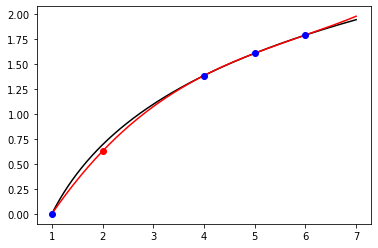

In [56]:
# Plotting the given data, our estimation for x=2
# and the actual function:
xx = np.linspace(1,7,300)
yy = np.log(xx)
yN = f_x1 + b2*(xx-x1)+b3*(xx-x1)*(xx-x2)+b4*(xx-x1)*(xx-x2)*(xx-x3)
data_x = np.array([x1,x2,x3,x4,x])
data_y = np.array([f_x1,f_x2,f_x3,f_x4,f_x])
plt.plot(xx,yy,"-",color="black")
plt.plot(xx,yN,"-",color="red")
plt.plot(data_x[0:4],data_y[0:4],"ob")
plt.plot(data_x[4],data_y[4],"or")
plt.show()

# Lagrange Interpolating Polynomials
Lagrange polynomials are yet another way to interpolate using the given data points where it uses the addition of the weighted data points.

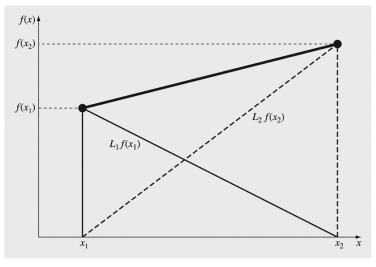
(Figure: Chapra, 2012)

**1st order Lagrange polynomial** is given by:
$$f_1(x) = L_1 f(x_1) + L_2 f(x_2)$$

where:
$$ L_1 = \frac{x-x_2}{x_1 - x_2},\;L_2 = \frac{x-x_1}{x_2-x_1}$$

so:
$$f_1(x) = \frac{x-x_2}{x_1 - x_2}f(x_1) + \frac{x-x_1}{x_2-x_1}f(x_2)$$

**2nd order Lagrange polynomial** is given by:
$$f_2(x) = L_1 f(x_1) + L_2 f(x_2)+L_3 f_(x_3)$$

where:
$$ L_1 = \frac{(x-x_2)(x-x_3)}{(x_1 - x_2)(x_1 - x_3)},\;L_2 = \frac{(x-x_1)(x-x_3)}{(x_2 - x_1)(x_2 - x_3)},\;L_3 = \frac{(x-x_1)(x-x_2)}{(x_3 - x_1)(x_3 - x_2)}$$

so:
$$f_2(x) = \frac{(x-x_2)(x-x_3)}{(x_1 - x_2)(x_1 - x_3)}f(x_1) + \frac{(x-x_1)(x-x_3)}{(x_2 - x_1)(x_2 - x_3)}f(x_2) + \frac{(x-x_1)(x-x_2)}{(x_3 - x_1)(x_3 - x_2)}f(x_3)$$

and in general:
$$f_{n-1}=\sum_{i=1}^{n}{L_i(x)f(x_i)},\quad L_i(x)=\prod_{j=1\\j\ne i}^{n}{\frac{x-x_j}{x_i-x_j}}$$

## Example
Use a Lagrange interpolating polynomial of the first and second order to evaluate the density of unused motor oil at $T=15^oC$ based on the following data:

$$x_1 = 0,\;f(x_1)=3.85\\
x_2 = 20,\;f(x_2) = 0.800\\
x_3 = 40,\;f(x_3) = 0.212$$

In [17]:
x1 = 0
f_x1 = 3.85

x2 = 20
f_x2 = 0.8

x = 15

f1_x = (x-x2) / (x1-x2) * f_x1\
      +(x-x1) / (x2-x1) * f_x2
print("1st order approximation: {:.6f}".format(f1_x))

x3 = 40
f_x3 = 0.212

f2_x = ((x-x2) * (x-x3)) / ((x1-x2) * (x1-x3)) * f_x1\
      +((x-x1) * (x-x3)) / ((x2-x1) * (x2-x3)) * f_x2\
      +((x-x1) * (x-x2)) / ((x3-x1) * (x3-x2)) * f_x3
print("2nd order approximation: {:.6f}".format(f2_x))

1st order approximation: 1.562500
2nd order approximation: 1.331687


## Example
Use the given $\ln(x)$ values to estimate $\ln2$ via Lagrange polynomial.

* $x_1 = 1,\;f(x_1) = 0$
* $x_2 = 4,\;f(x_2)=1.386294$
* $x_3 = 6,\;f(x_3)=1.791759$

(calculate the true percentage relative error ($\varepsilon_t$) using the true value of $\ln2 = 0.693147$)

In [18]:
x1 = 1
f_x1 = 0

x2 = 4
f_x2 = 1.386294

x3 = 6
f_x3 = 1.791759

x = 2

f2_x = ((x-x2) * (x-x3)) / ((x1-x2) * (x1-x3)) * f_x1\
      +((x-x1) * (x-x3)) / ((x2-x1) * (x2-x3)) * f_x2\
      +((x-x1) * (x-x2)) / ((x3-x1) * (x3-x2)) * f_x3

print("      ln2 ~ {:.6f}".format(f2_x))
print("True value: {:.6f}".format(np.log(2)))
print("       E_t: {:.2f}%".format((np.log(2)-f2_x)/np.log(2)*100))

      ln2 ~ 0.565844
True value: 0.693147
       E_t: 18.37%


### via the builtin scipy.interpolate.lagrange() function
[scipy.interpolate.lagrange()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)

In [19]:
## Using the built in implementation:
from scipy.interpolate import lagrange
x = [1,4,6]
y = [0,1.386294, 1.791759]

p = lagrange(x,y)
print(p)
np.polyval(p,2)

          2
-0.05187 x + 0.7215 x - 0.6696


0.5658442

# Inverse Interpolation
Normally, we do interpolation to calculate $f(x)$ for some $x$ value that lies between given data points. However, sometimes, it might be necessary to find the $x$ corresponding to a given $f(x)$ value - this operation is called the _inverse interpolation_.

The first thing that comes to mind is to reinterpret $x$ as $f(x)$ and $f(x)$ as $x$, then to proceed as a normal interpolation. This can have its own penalties. Consider $f(x) = 1/x$ function. So for a number of observations from $x=1,\dots, 7$, we will have:

In [20]:
np.set_printoptions(precision=3)
x = np.arange(1,8)
y = 1/x
print(np.array([x,y]))

[[1.    2.    3.    4.    5.    6.    7.   ]
 [1.    0.5   0.333 0.25  0.2   0.167 0.143]]


now suppose that we want to find the value of $x$ such that $f(x)=0.3$. Inverting $x\leftrightarrow f(x)$ yields:

In [21]:
print(np.array([y,x]))
p = np.polyfit(y,x,6)
pol = np.poly1d(p)

[[1.    0.5   0.333 0.25  0.2   0.167 0.143]
 [1.    2.    3.    4.    5.    6.    7.   ]]


In [22]:
print(p)
print(pol)

[  5040. -13068.  13132.  -6769.   1960.   -322.     28.]
      6             5             4        3        2
5040 x - 1.307e+04 x + 1.313e+04 x - 6769 x + 1960 x - 322 x + 28


In [23]:
np.polyval(p,0.3)

3.3251200000007834

... or, we can use our heads, as usual! ;)

What we lacked in the above approximation is we failed to _read_ the data. The data, with the given (x,y) order was evenly spaced. Therefore we could have gone for a 2nd order fit around $x=\{2,3,4\}$. Focusing there:

In [24]:
q = np.polyfit(x[1:4],y[1:4],2)
pol2 = np.poly1d(q)
print(pol2)

         2
0.04167 x - 0.375 x + 1.083


We are looking at a value of $x$ where the above equation becomes 0.3, in other words:

$$0.3 = 0.04167 x^2 - 0.375 x + 1.083$$

and this is just a problem of finding the root!

In [25]:
x = np.roots([0.04167,-0.375,1.083-0.3])
print(x)

[5.706 3.293]


Continuing to using our heads, we remember that, we were looking for the solutions between 2 and 4, hence we take 3.293 -- considering that the true value being 3.333, we did a great job, by keeping to our human sides, not by being a number cruncher! 8)

# Bonus: Finite Difference Method
_(not quite interpolation but still... ;)_

When we have a differential equation and the values at boundaries are known, we can interpolate via the finite differences method to approximate the derivatives as the slopes of the lines connecting the data points.

Suppose that we want to calculate the derivative of a function at the $x_i$ point. We can take one of the two approaches to approximate the derivative:

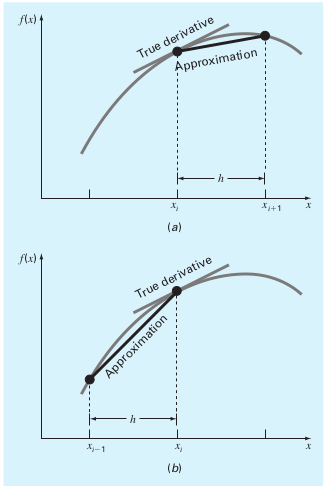 (Chapra, 2012)

**a) Forward Finite Difference Approximation**

Here, we have the slope as:
$$\frac{\text{d}f(x)}{\text{d}x}\biggr\vert_{x_i} \approx \frac{f(x_{i+1})-f(x_{i})}{h}$$

**b) Backward Finite Difference Approximation**

Considering the backward we can also write the slope as:

$$\frac{\text{d}f(x)}{\text{d}x}\biggr\vert_{x_i} \approx \frac{f(x_{i})-f(x_{i-1})}{h}$$

but the best of the both worlds would be to take both into account:

**Centered Finite Difference Approximation**
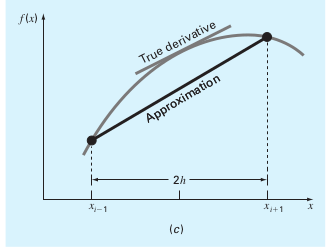 (Chapra, 2012)

$$\frac{\text{d}f(x)}{\text{d}x}\biggr\vert_{x_i} \approx \frac{f(x_{i+1})-f(x_{i-1})}{2h}$$

## 2nd order derivative approximation:
As the 2nd order derivative is the "derivative of the derivative", we can simply plug-in the forward and the backward differences:

$$\frac{\text{d}^2 f(x)}{\text{d}x^2}\biggr\vert_{x_i} \approx \frac{\frac{f(x_{i+1})-f(x_{i})}{h}-\frac{f(x_{i})-f(x_{i-1})}{h}}{h}=\frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{h^2}$$

_(although these straight-forward deductions seem to work, the actual derivations are done through Taylor expansions)_

## Example (Capra, 2012)
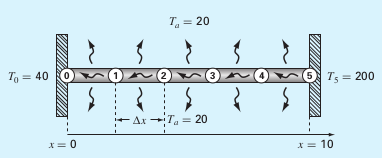

The figure shows a long, thin rod positioned between two walls that are held at constant temperatures. Heat flows through the rod as well as between the rod and the surrounding air. For the steady-state case, a differential equation based on heat conservation can be written for such a system as:

$$\frac{\text{d}^2T}{\text{d}x^2}-h'(T_a - T) = 0$$

where $T$ is the temperature ($^oC$), $x$ is the distance along the rod (m), $h'$ is the heat transfer coefficient between the rod and the surrounding air ($m^{-2}$) and $T_a$ is the air temperature ($^oC$).

Given $h'=0.01m^{-2}$, $T_a = 20^oC$, $T(x=0) = 40^oC$ and $T(x=10\,m) = 200^oC$, calculate the temperature at the marked points in between.

**Solution**

If we approximate the 2nd order derivative with the finite difference method, we will have for each of the marked points ($T_i,\;i={1,2,3,4}$ -- $T_0$ and $T_5$ are given and $\Delta x = 2\,m$):

$$\frac{\text{d}^2T}{\text{d}x^2}\biggr\vert_{i}\approx \frac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta x^2}$$

and the main differential equation takes the form of:
$$\frac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta x^2}+h'(T_a - T_i)=0$$

Expanding and re-arranging yields:
$$-T_{i-1}+(2+\Delta x^2 h')T_i-T_{i+1} = \Delta x^2 h' T_a$$

substituting the values of $\Delta x = 2\,m$, $T_a = 20^oC$ and $h'  =0.01 m^{-2}$:

$$-T_{i-1}+2.04 T_i-T_{i+1} = 0.8$$

Writing explicitly for each of the points, we have:

$$\begin{align*}
-T_0 + 2.04T_1-T_2&=0.8\\
-T_1 + 2.04T_2-T_3&=0.8\\
-T_2 + 2.04T_3-T_4&=0.8\\
-T_3 + 2.04T_4-T_5&=0.8
\end{align*}$$

We already have $T_0$ and $T_5$ values:
$$\begin{align*}
2.04T_1-T_2&=40.8\\
-T_1 + 2.04T_2-T_3&=0.8\\
-T_2 + 2.04T_3-T_4&=0.8\\
-T_3 + 2.04T_4&=200.8
\end{align*}$$

This is nothing but a linear equation set! So all of a sudden our 2nd order ODE has transformed into a set of 4 linear equations with 4 unknowns!

$$\begin{bmatrix}2.04 & -1 & 0 & 0\\
-1 & 2.04 & -1 & 0 \\
0 &-1 & 2.04 & -1 \\
0 & 0 & -1 & 2.04 
\end{bmatrix}
\begin{bmatrix} T_1\\T_2\\T_3\\T_4\end{bmatrix}=\begin{bmatrix} 40.8\\0.8\\0.8\\200.8\end{bmatrix}$$

In [26]:
A1 = np.diag([2.04,2.04,2.04,2.04])
A2 = np.diag([-1,-1,-1],1)
A3 = np.diag([-1,-1,-1],-1)
A = A1+A2+A3
print(A)

[[ 2.04 -1.    0.    0.  ]
 [-1.    2.04 -1.    0.  ]
 [ 0.   -1.    2.04 -1.  ]
 [ 0.    0.   -1.    2.04]]


In [27]:
b = np.array([40.8,0.8,0.8,200.8])
print(b)

[ 40.8   0.8   0.8 200.8]


In [28]:
T = np.linalg.solve(A,b)
print(T)

[ 65.97   93.778 124.538 159.48 ]


Btw, the analytical solution of the given ODE is:
$$T(X) = 73.4523e^{0.1x}-53.4523e^{-0.1x}+20$$

Let's check how good did we do:

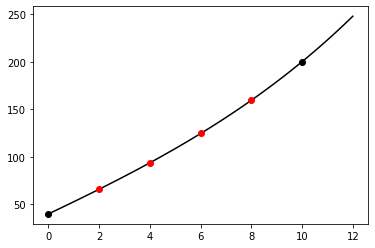

In [57]:
def fT(x):
    return 73.4523*np.exp(0.1*x)-53.4523*np.exp(-0.1*x)+20

xx = np.linspace(0,12,100)
TT = fT(xx)
plt.plot(xx,TT,"-",color="black")
plt.plot(np.arange(2,9,2),T,"ro")
plt.plot([0,10],[40,200],"ko")
plt.show()

# References
* Heavily benefitted from Chapra's "Applied Numerical Methods with MATLAB for Engineers and Scientists" (2012) along with dear Dr. Eda Çelik Akdur's "KMU 231 - Numerical Analysis" lecture notes.
* The divided differences scheme's $\LaTeX$ code was adapted from the corresponding [Wikipedia entry](https://en.wikipedia.org/w/index.php?title=Newton_polynomial&oldid=994324116#Examples).
